# 0.0 IMPORTS

In [106]:
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import seaborn as sns
import numpy as np

from IPython.core.display    import HTML

## 0.1 PROCESSING TABLE FILES

In [6]:
df1 = pd.read_csv('dump_mysql/tbCountry.csv')
df1.to_csv('dump_mysql/tbCountry_processed.csv', index=False)

df2 = pd.read_csv('dump_mysql/tbInvestment.csv')
df2.to_csv('dump_mysql/tbInvestment_processed.csv', index=False)

df3 = pd.read_csv('dump_mysql/tbInvestor.csv')
df3.to_csv('dump_mysql/tbInvestor_processed.csv', index=False)

df4 = pd.read_csv('dump_mysql/tbInvestorAddress.csv')
df4.to_csv('dump_mysql/tbInvestorAddress_processed.csv', index=False)

df5 = pd.read_csv('dump_mysql/tbInvestorCompany.csv')
df5.to_csv('dump_mysql/tbInvestorCompany_processed.csv', index=False)

df6 = pd.read_csv('dump_mysql/tbInvestorWork.csv')
df6.to_csv('dump_mysql/tbInvestorWork_processed.csv', index=False)

df7 = pd.read_csv('dump_mysql/tbInvestorProject.csv')
df7.to_csv('dump_mysql/tbInvestorProject_processed.csv', index=False)

df8 = pd.read_csv('dump_mysql/tbInvestorProjectCategory.csv')
df8.to_csv('dump_mysql/tbInvestorProjectCategory_processed.csv', index=False)

## 0.2 Helper Functions

In [107]:
def jupyter_settings(): 
    %matplotlib inline 
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [24, 20]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') ) 
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 1000
    pd.set_option( 'display.expand_frame_repr', False ) 
    sns.set()

In [108]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.3 Data Collect & Data Loading

In [2]:
# credentials
host='ec2-3-229-252-6.compute-1.amazonaws.com'
db='defli5ko5i9jns'
port=5432
username='bxyxdyaksdwclm'
pwd='948dec09f999623e38b0baba146edc7ae0d53152ffa60db354523fcd3c1504bd'

In [3]:
conn = pg.connect(host=host,
                 database=db,
                 port=port,
                 user=username,
                 password=pwd)

In [4]:
conn.cursor()

cursor = conn.cursor()

query = """SELECT * FROM dw.investor tbInvestor
LEFT JOIN dw.investor_work tbInvestorWork ON tbinvestor.id = tbInvestorWork.investor
LEFT JOIN dw.investor_address tbInvestorAddress  ON tbInvestor.id = tbInvestorAddress.investor
left join dw.investor_company tbInvestorCompany ON tbInvestor.id = tbInvestorCompany.investor
LEFT JOIN dw.investment tbInvestment ON tbInvestor.id = tbInvestment.investor
LEFT JOIN dw.country tbCountry ON tbInvestorAddress.country = tbCountry.id
left join dw.project tbProject ON tbInvestment.project = tbProject.id
left join dw.project_category tbProjectCategory ON tbProject.project_category = tbProjectCategory.id"""

df_raw = psql.read_sql(query, conn)
print(df_raw.head(5))

cursor.close()
conn.close()

   id date_created       birth marital_status gender investor_type  \
0   3   2018-08-23  1982-08-11      Casado(a)    1.0            pf   
1  16   2018-09-03  1973-05-04      Casado(a)    1.0            pf   
2   6   2018-08-26  1985-07-04    Solteiro(a)    1.0            pf   
3  11   2018-08-27  1982-07-01      Casado(a)    1.0            pf   
4  34   2018-09-06  1987-10-08    Solteiro(a)    1.0            pf   

      nationality channel    id date_created  ...    validity     value  \
0  brazilian_born    None  3603   2021-01-08  ...  2018-10-31  750000.0   
1  brazilian_born    None    12   2018-09-03  ...  2018-10-31  750000.0   
2  brazilian_born    None  3591   2021-01-06  ...  2018-10-31  750000.0   
3  brazilian_born    None  2969   2020-11-12  ...  2018-10-31  750000.0   
4  brazilian_born    None  3069   2020-11-21  ...  2018-10-31  750000.0   

  project_category      closed   date_open modality    target id date_created  \
0                1  2018-11-01  2018-10-01     

# 1.0 DESCRIÇÃO DOS DADOS

In [10]:
df_raw.to_csv('../data/raw/data_raw.csv', index=False)

In [11]:
df1 = df_raw.copy()
df1.head(5)

,id,date_created,birth,marital_status,gender,investor_type,nationality,channel,id,date_created,...,validity,value,project_category,closed,date_open,modality,target,id,date_created,name
0,3,2018-08-23,1982-08-11,Casado(a),1.0,pf,brazilian_born,None,3603,2021-01-08,...,2018-10-31,750000.0,1,2018-11-01,2018-10-01,1,500000.0,1,None,Imobiliária
1,16,2018-09-03,1973-05-04,Casado(a),1.0,pf,brazilian_born,None,12,2018-09-03,...,2018-10-31,750000.0,1,2018-11-01,2018-10-01,1,500000.0,1,None,Imobiliária
2,6,2018-08-26,1985-07-04,Solteiro(a),1.0,pf,brazilian_born,None,3591,2021-01-06,...,2018-10-31,750000.0,1,2018-11-01,2018-10-01,1,500000.0,1,None,Imobiliária
3,11,2018-08-27,1982-07-01,Casado(a),1.0,pf,brazilian_born,None,2969,2020-11-12,...,2018-10-31,750000.0,1,2018-11-01,2018-10-01,1,500000.0,1,None,Imobiliária
4,34,2018-09-06,1987-10-08,Solteiro(a),1.0,pf,brazilian_born,None,3069,2020-11-21,...,2018-10-31,750000.0,1,2018-11-01,2018-10-01,1,500000.0,1,None,Imobiliária


## 1.1 Renomeando Colunas

In [12]:
new_columns = ['id_investor', 'date_created_investor', 'id_birth_investor', 'marital_status_investor', 'igender_investor',
       'investor_type_investor', 'nationality_investor', 'id_channel_investor', 'id_investor_work', 'date_created_investor_work',
       'investor_investor_work', 'office_investor_work', 'profession_investor_work', 'id_investor_address', 'date_created_investor_address', 'country_investor_address',
       'investor_investor_address', 'state_investor_address', 'id_investor_company', 'date_created_investor_company', 'investor_investor_company',
       'constitution_date_investor_company', 'company_type_investor_company', 'id_investment', 'date_created_investment', 'anonymous_investment',
       'investor_investment', 'project_investment', 'value_investment', 'id_country', 'date_created_country', 'iso2_country', 'iso3_country',
       'country_name', 'phone_code_country', 'flag_country', 'id_project', 'date_created_project', 'validity_project', 'value_project',
       'project_category_project', 'closed_project', 'date_open_project', 'modality_project', 'target_project', 'id_project_category',
       'date_created_project_category', 'type_project_project_category']

df1.columns = new_columns

In [13]:
df1.head()

,id_investor,date_created_investor,id_birth_investor,marital_status_investor,igender_investor,investor_type_investor,nationality_investor,id_channel_investor,id_investor_work,date_created_investor_work,...,validity_project,value_project,project_category_project,closed_project,date_open_project,modality_project,target_project,id_project_category,date_created_project_category,type_project_project_category
0,3,2018-08-23,1982-08-11,Casado(a),1.0,pf,brazilian_born,None,3603,2021-01-08,...,2018-10-31,750000.0,1,2018-11-01,2018-10-01,1,500000.0,1,None,Imobiliária
1,16,2018-09-03,1973-05-04,Casado(a),1.0,pf,brazilian_born,None,12,2018-09-03,...,2018-10-31,750000.0,1,2018-11-01,2018-10-01,1,500000.0,1,None,Imobiliária
2,6,2018-08-26,1985-07-04,Solteiro(a),1.0,pf,brazilian_born,None,3591,2021-01-06,...,2018-10-31,750000.0,1,2018-11-01,2018-10-01,1,500000.0,1,None,Imobiliária
3,11,2018-08-27,1982-07-01,Casado(a),1.0,pf,brazilian_born,None,2969,2020-11-12,...,2018-10-31,750000.0,1,2018-11-01,2018-10-01,1,500000.0,1,None,Imobiliária
4,34,2018-09-06,1987-10-08,Solteiro(a),1.0,pf,brazilian_born,None,3069,2020-11-21,...,2018-10-31,750000.0,1,2018-11-01,2018-10-01,1,500000.0,1,None,Imobiliária


## 1.2 Dimensão dos Dados

In [14]:
print('Número de Linhas: {}'.format(df1.shape[0]))
print('Número de Colunas: {}'.format(df1.shape[1]))

Número de Linhas: 28093
Número de Colunas: 48


## 1.2 Check Types

In [15]:
df1.dtypes

date_created_investor
date_created_investor_work
date_created_investor_address
date_created_investor_company
date_created_investment
date_created_country
date_created_project
date_created_project_category

id_investor                            object
date_created_investor                  object
id_birth_investor                      object
marital_status_investor                object
igender_investor                       object
investor_type_investor                 object
nationality_investor                   object
id_channel_investor                    object
id_investor_work                       object
date_created_investor_work             object
investor_investor_work                 object
office_investor_work                   object
profession_investor_work               object
id_investor_address                    object
date_created_investor_address          object
country_investor_address               object
investor_investor_address              object
state_investor_address                 object
id_investor_company                    object
date_created_investor_company          object
investor_investor_company              object
constitution_date_investor_company

##  1.3 Check Valores Nulos

In [16]:
df1.isna().sum()

id_investor                               0
date_created_investor                     0
id_birth_investor                     10216
marital_status_investor               17027
igender_investor                      10432
investor_type_investor                    0
nationality_investor                      0
id_channel_investor                   21050
id_investor_work                      17153
date_created_investor_work            17153
investor_investor_work                17153
office_investor_work                  17248
profession_investor_work              17163
id_investor_address                   10271
date_created_investor_address         10271
country_investor_address              10271
investor_investor_address             10271
state_investor_address                10273
id_investor_company                   27669
date_created_investor_company         27669
investor_investor_company             27669
constitution_date_investor_company    28093
company_type_investor_company   

## 1.5 Preechimento dos Valores Nulos

## 1.6 Alteração dos Tipos Dos Dados

In [17]:
df1['date_created_investor'] = df1['date_created_investor'].astype('datetime64[ns]') 
df1['date_created_investor_work'] = df1['date_created_investor_work'].astype('datetime64[ns]')
df1['date_created_investor_address'] = df1['date_created_investor_address'].astype('datetime64[ns]')
df1['date_created_investor_company'] = df1['date_created_investor_company'].astype('datetime64[ns]')
df1['date_created_investment'] = df1['date_created_investment'].astype('datetime64[ns]')
df1['date_created_country'] = df1['date_created_country'].astype('datetime64[ns]')
df1['date_created_project'] = df1['date_created_project'].astype('datetime64[ns]')
df1['date_created_project'] = df1['date_created_project'].astype('datetime64[ns]')

## 1.7 Estatistica Descritiva

In [18]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

## 1.8 Atributos Numéricos

In [19]:
# Central Tendency - mean, meadina
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
# dispersion - std, min, max, range
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std']
m

,attributes,min,max,range,mean,median,std
0,anonymous_investment,0.0,1.0,1.0,3.563521e-01,NaN,4.789209e-01
1,value_investment,500.0,600000.0,599500.0,1.209575e+04,NaN,2.098462e+04
2,value_project,340000.0,5000000.0,4660000.0,2.607509e+06,NaN,1.345128e+06
3,target_project,340000.0,4000000.0,3660000.0,1.818502e+06,NaN,9.654244e+05


## 1.8 Atributos Categóricos

In [90]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

id_                    22459
birth                   7881
marital_status             6
gender                     4
investor_type              2
nationality                3
channel                   12
id_investor             5330
investor                5330
office                  2316
profession              1602
id_investor_address    12189
country                   25
investor               12189
state                     63
id_investor_company      273
investor                 273
constitution_date          1
company_type               8
id_investment           9124
investor                3490
project                   61
id_country                25
iso2                      25
iso3                      25
country_name              25
phone_code                23
flag                      25
id_project                61
validity                  56
project_category           6
closed                    60
date_open                 58
modality                   3
id_project_cat

# 2.0 FEATURE ENGINEERING

In [66]:
df2 = df1.copy()

In [68]:
# year
df2['year_created_investor'] = df2['date_created_investor'].dt.year

# month
df2['month_created_investor'] = df2['date_created_investor'].dt.month

# day
df2['day_created_investor'] = df2['date_created_investor'].dt.day

# week of year
df2['week_of_year_investment'] = df2['date_created_investment'].dt.weekofyear

# year week
df2['year_week_investment'] = df2['date_created_investment'].dt.strftime( '%Y-%W' )

# 3.0 FILTRAGEM DOS ATRIBUTOS

In [142]:
df3 = df2.copy()
df3 = df3[df3['value_investment'] <= 100000]

# 4.0 ANALISE EXPLORATÓRIA DOS DADOS

In [143]:
df4 = df3.copy()

C:\Users\vinic\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='value_investment', ylabel='Density'>

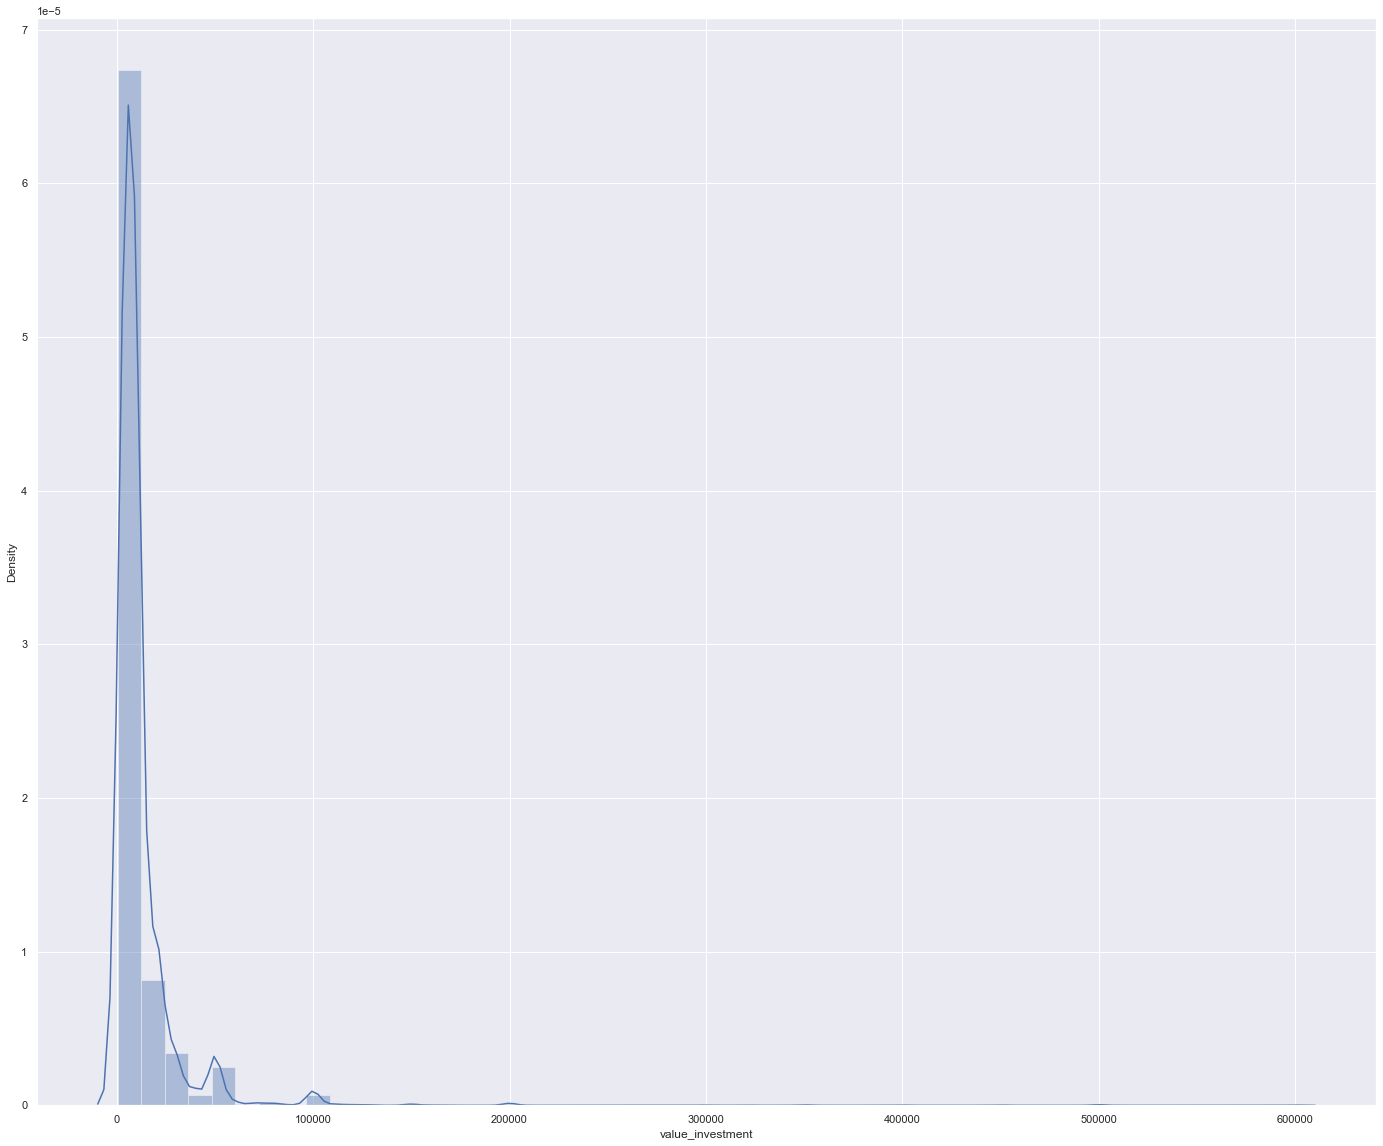

In [144]:
# valor investido
sns.distplot(df2['value_investment'])

## 3.1 Atributos Numéricos

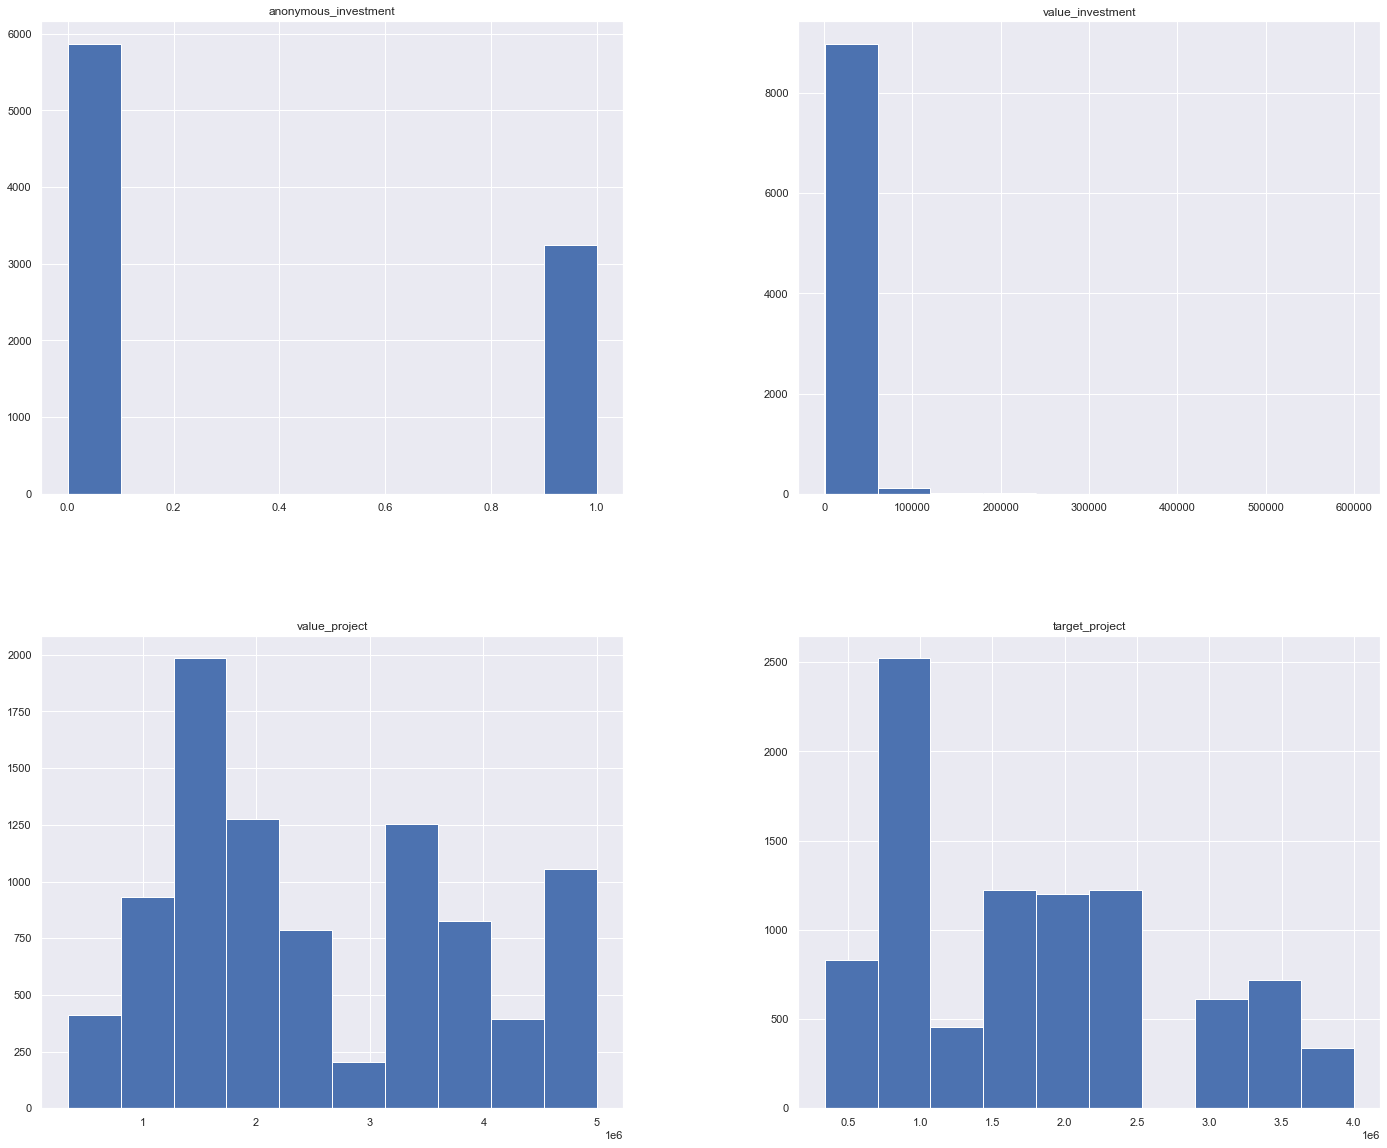

In [145]:
num_attributes.hist();

C:\Users\vinic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='value_investment'>

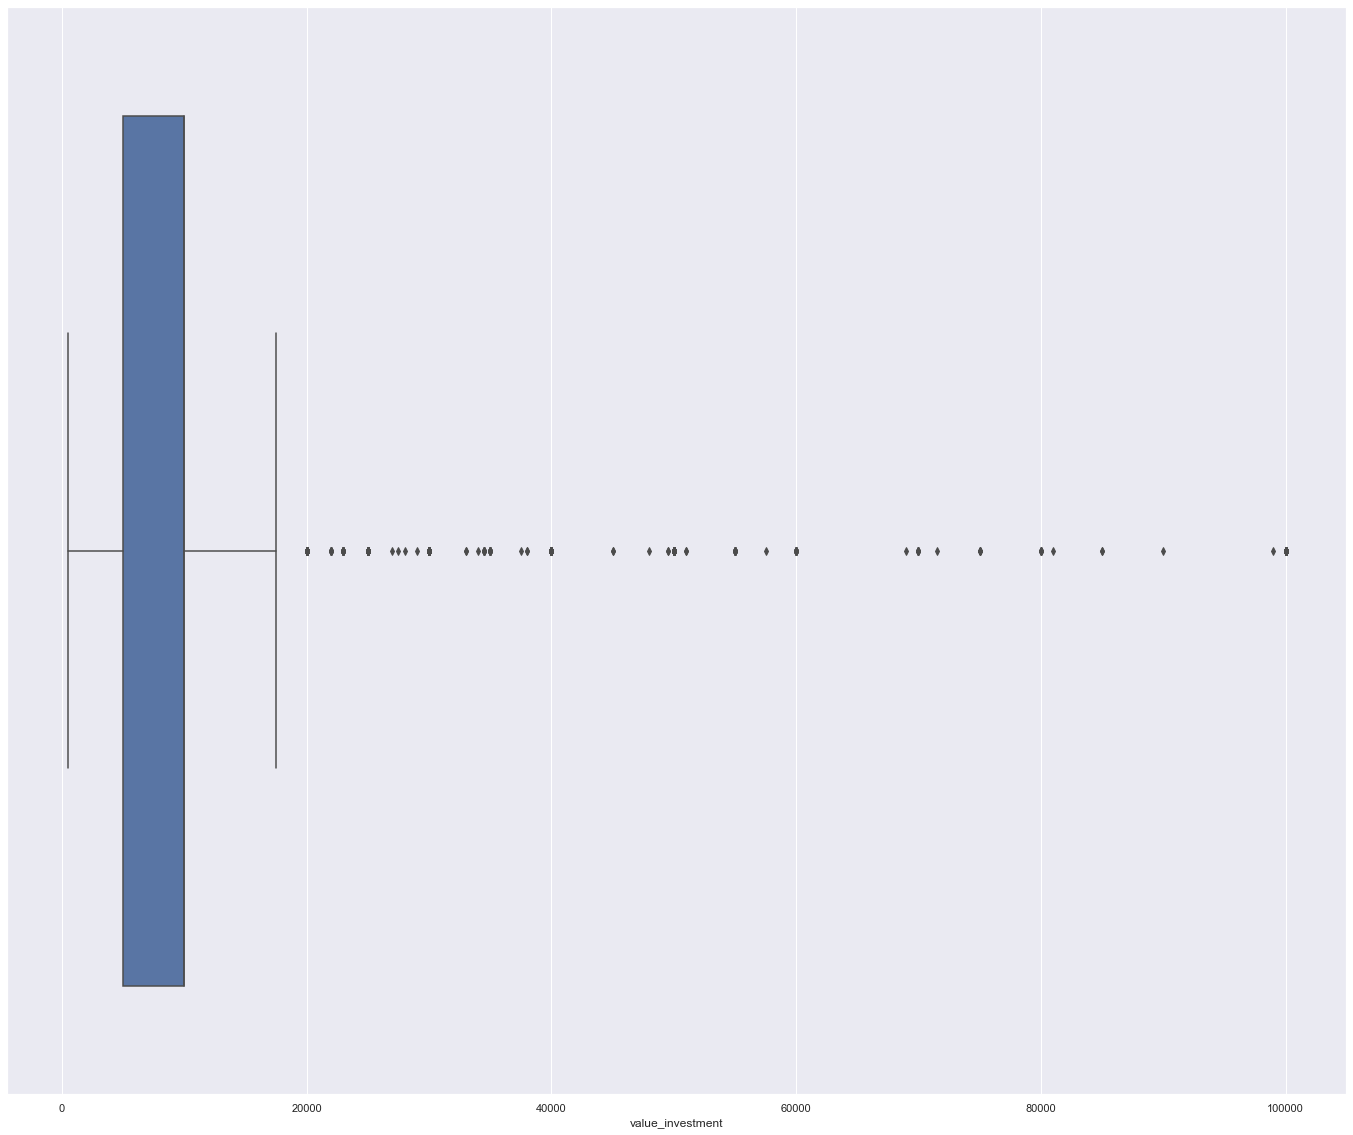

In [146]:
sns.boxplot(aux['value_investment'])

<AxesSubplot:xlabel='year_week_investment'>

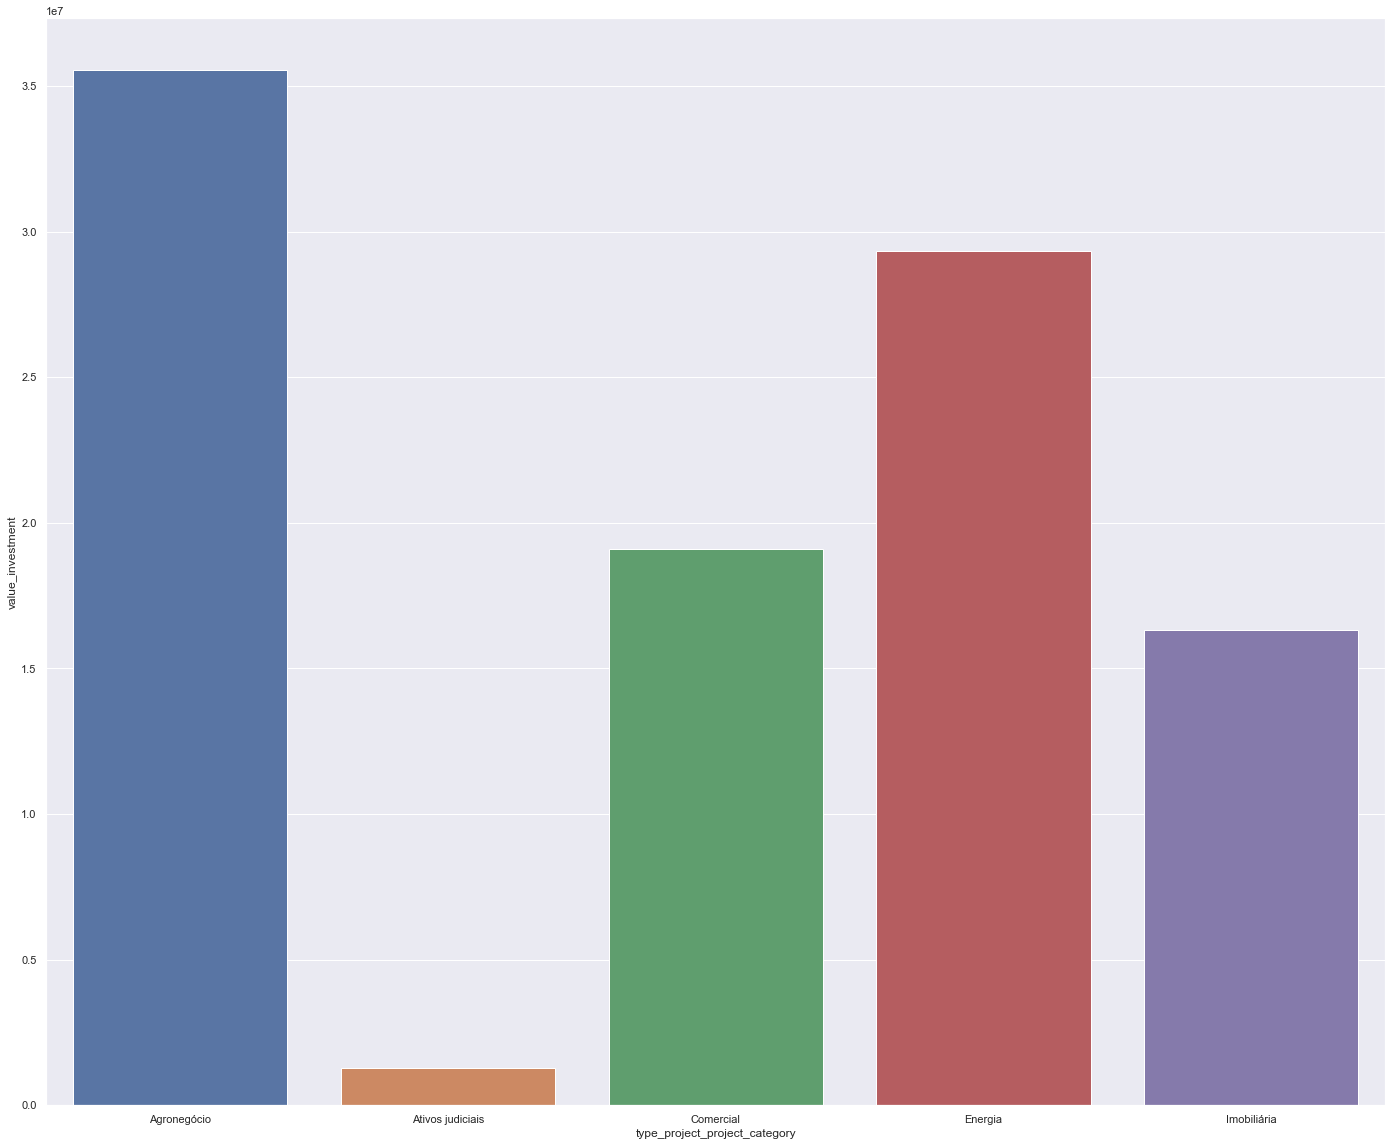

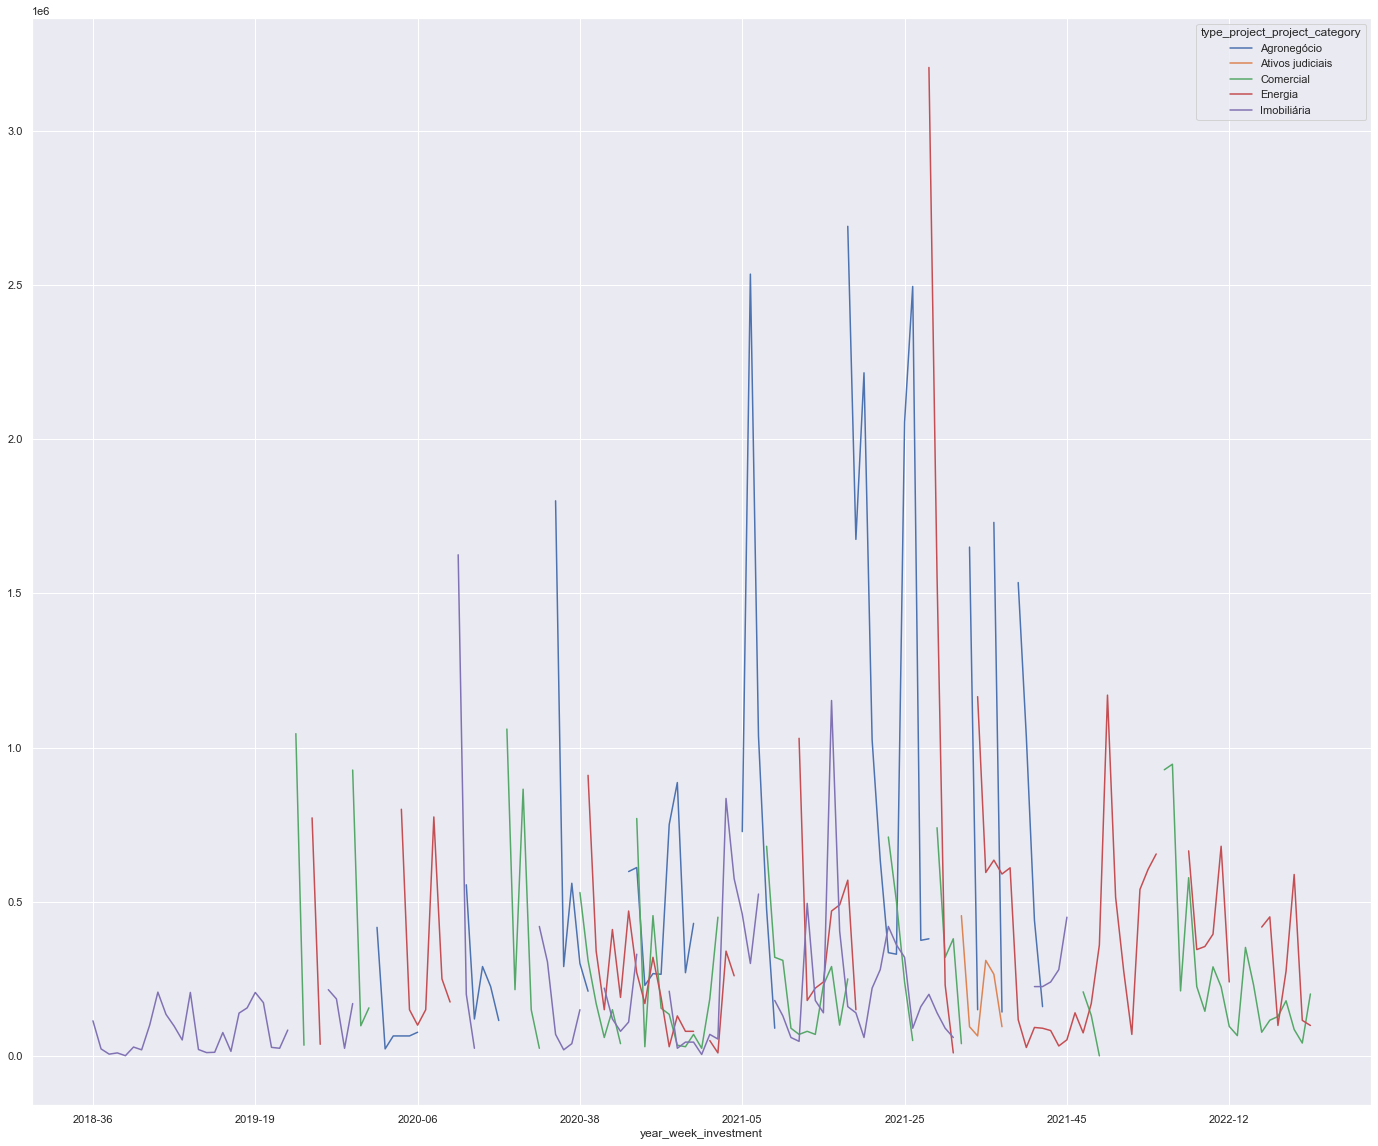

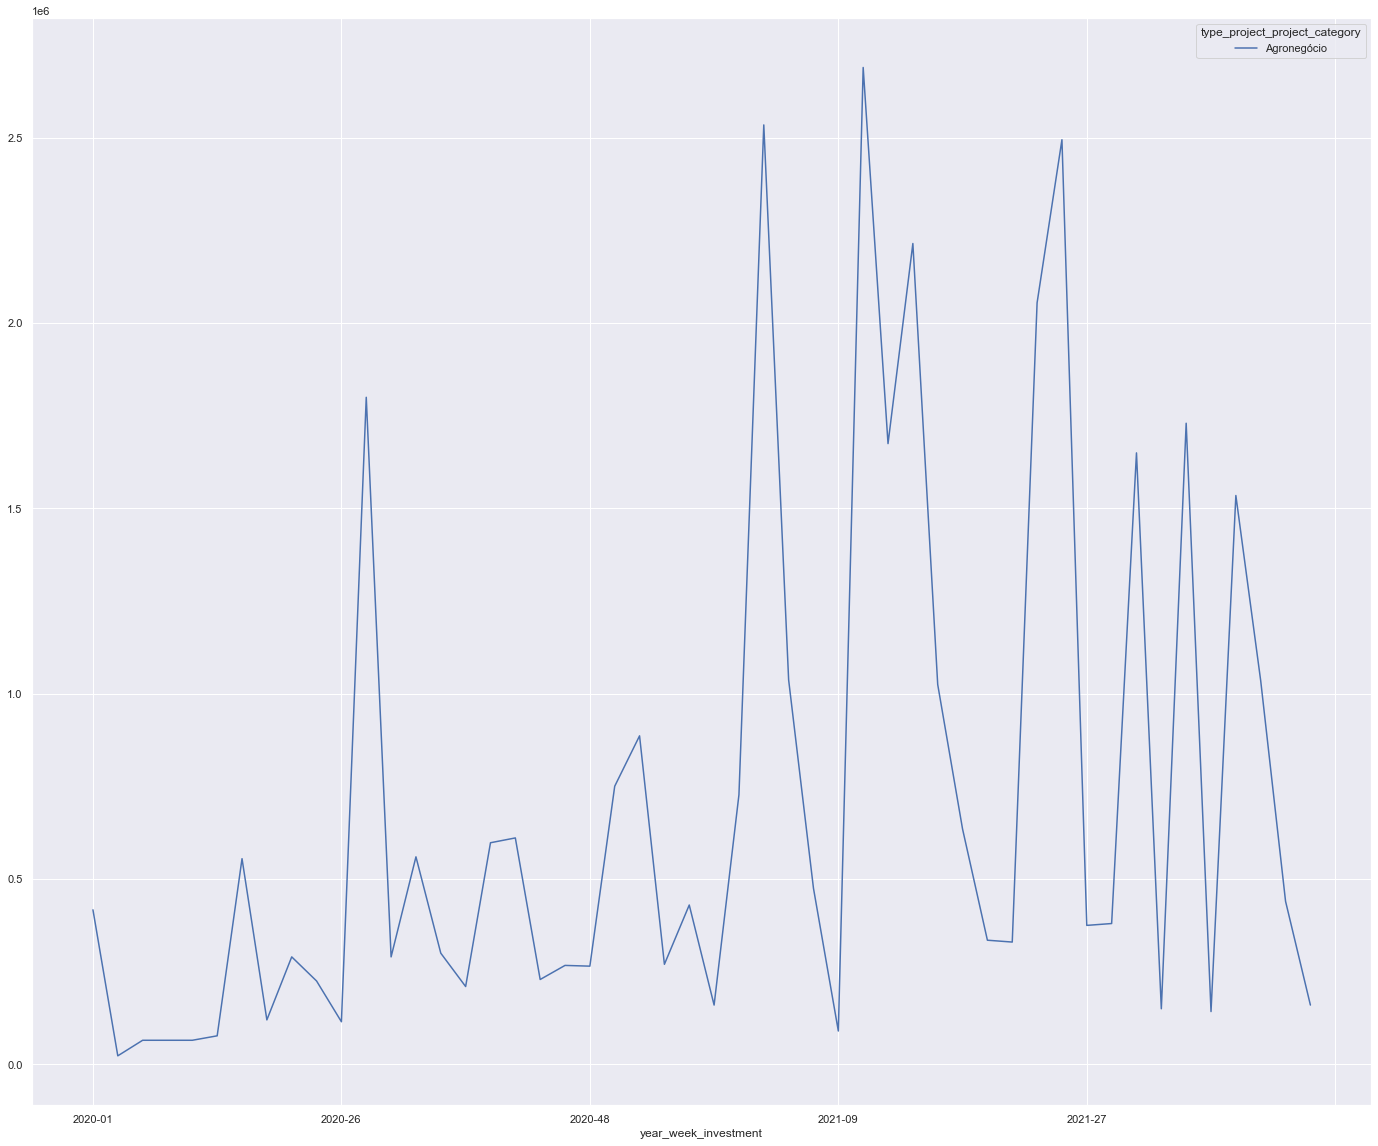

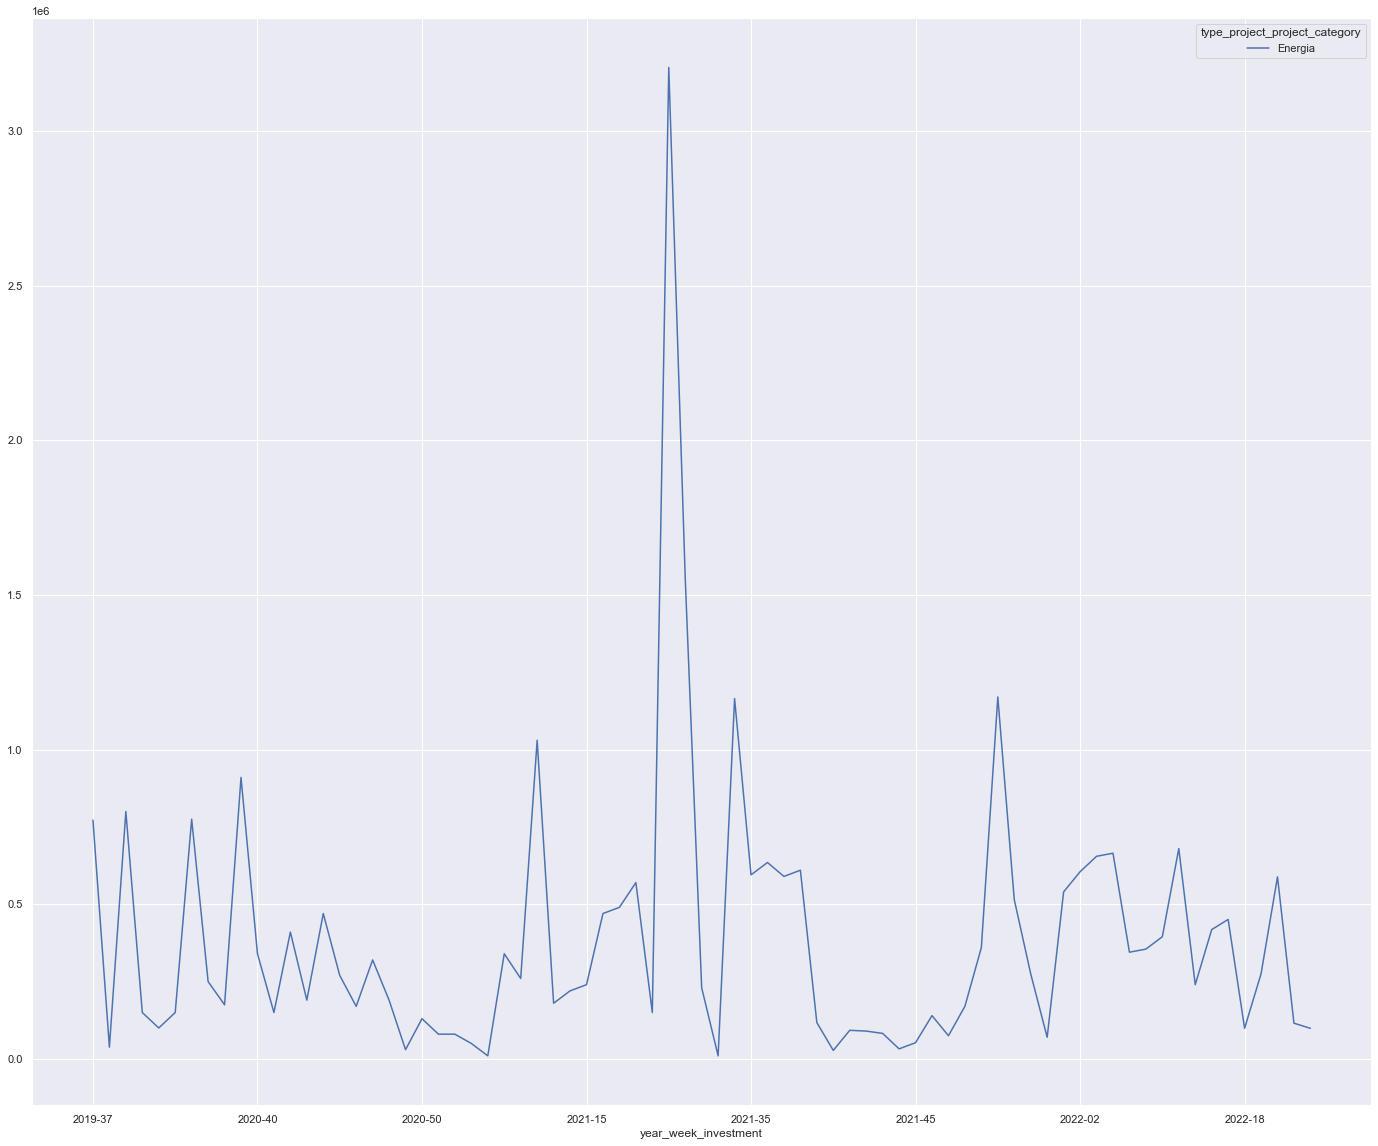

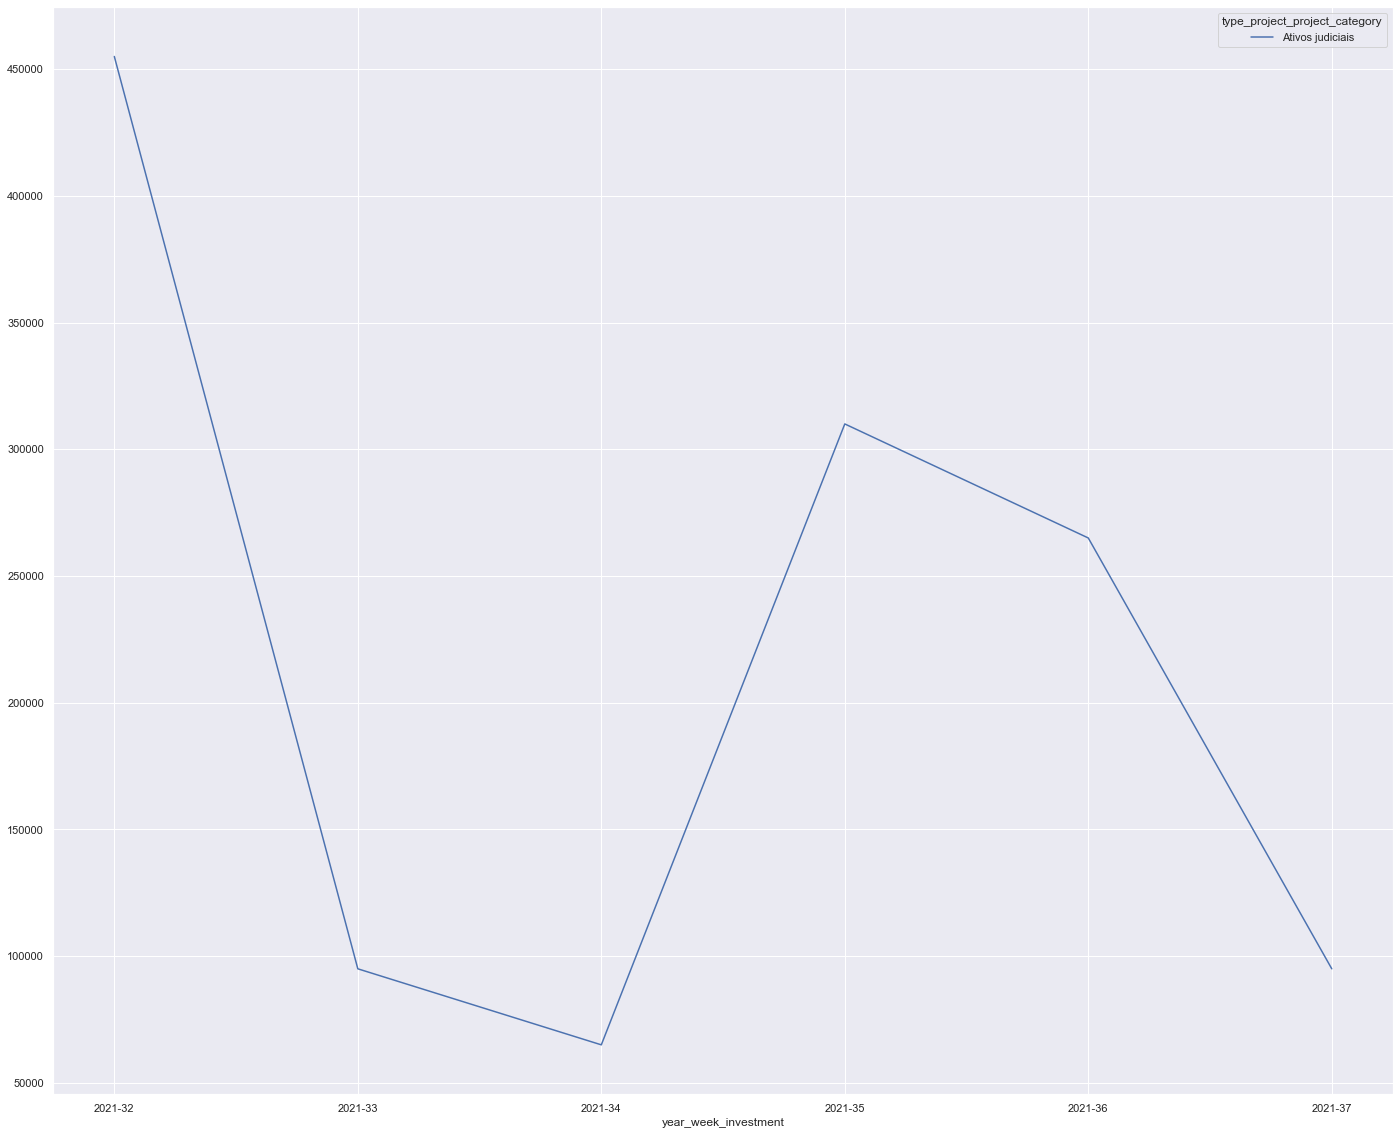

In [153]:
aux1 = df4[['type_project_project_category', 'value_investment']].groupby( 'type_project_project_category' ).sum().reset_index()
sns.barplot( x='type_project_project_category', y='value_investment', data=aux1 );

aux2 = df4[['year_week_investment', 'type_project_project_category', 'value_investment']].groupby( ['year_week_investment','type_project_project_category'] ).sum().reset_index()
aux2.pivot( index='year_week_investment', columns='type_project_project_category', values='value_investment' ).plot()

aux3 = aux2[aux2['type_project_project_category'] == 'Agronegócio']
aux3.pivot( index='year_week_investment', columns='type_project_project_category', values='value_investment' ).plot()

aux4 = aux2[aux2['type_project_project_category'] == 'Energia']
aux4.pivot( index='year_week_investment', columns='type_project_project_category', values='value_investment' ).plot()

aux5 = aux2[aux2['type_project_project_category'] == 'Ativos judiciais']
aux5.pivot( index='year_week_investment', columns='type_project_project_category', values='value_investment' ).plot()

In [172]:
import datetime
import pandas as pd
start = datetime.datetime.strptime("2018-08-22", "%Y-%d-%M")
end = datetime.datetime.strptime("2022-06-02", "%Y-%d-%M")
date_generated = pd.date_range(start, end)
print(date_generated.strftime("%Y-%d-%M"))

Index(['2018-08-22', '2018-09-22', '2018-10-22', '2018-11-22', '2018-12-22',
       '2018-13-22', '2018-14-22', '2018-15-22', '2018-16-22', '2018-17-22',
       ...
       '2021-27-22', '2021-28-22', '2021-29-22', '2021-30-22', '2021-31-22',
       '2022-01-22', '2022-02-22', '2022-03-22', '2022-04-22', '2022-05-22'],
      dtype='object', length=1459)
